#### **1. Загрузка данных и подготовка данных**

- **Загрузка данных**: Очищенные данные загружаются из файла `cleaned_data.xlsx`.
- **Разделение на признаки и целевую переменную**: Исходные данные разделяются на матрицу признаков `X` (все столбцы, кроме целевых переменных) и целевую переменную `y` (`log_IC50_mM`).
- **Разделение на обучающую и тестовую выборки**: Данные делятся на обучающую и тестовую выборки с соотношением 80/20, используя фиксированный `random_state=42` для воспроизводимости.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Загрузка очищенных данных
data = pd.read_excel('data/cleaned_data.xlsx')

# Разделение данных на признаки и целевую переменную
X = data.drop(columns=['IC50_mM', 'CC50_mM', 'SI', 'log_IC50_mM', 'log_CC50_mM', 'log_SI'])
y = data['log_IC50_mM']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### **2. Построение моделей регрессии**

- **Модель линейной регрессии**: Создается объект класса `LinearRegression` и обучается на обучающей выборке.
- **Оценка качества модели**: Вычисляются метрики RMSE (Root Mean Squared Error) и $R^2$ для оценки точности предсказаний на тестовой выборке.

In [4]:

# Линейная регрессия
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Линейная регрессия: RMSE={rmse_lr}, R²={r2_lr}')


Линейная регрессия: RMSE=0.6080534145838916, R²=0.3321787426737063


##### **2.2 Деревья решений**

- **Модель деревьев решений**: Создается объект класса `DecisionTreeRegressor` с фиксированным `random_state=42` для воспроизводимости.
- **Оценка качества модели**: Аналогично линейной регрессии, вычисляются RMSE и $R^2$ для дерева решений.


In [5]:

# Деревья решений
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
rmse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f'Деревья решений: RMSE={rmse_dt}, R²={r2_dt}')


Деревья решений: RMSE=0.8281004171648452, R²=0.09050249777496133


##### **2.3 Случайный лес**

- **Модель случайного леса**: Создается объект класса `RandomForestRegressor` с фиксированным `random_state=42`.
- **Гиперпараметры и Grid Search**: Используется `GridSearchCV` для поиска оптимальных гиперпараметров (`n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`) с использованием 5-кратной кросс-валидации и метрикой `neg_mean_squared_error`.
- **Оценка качества модели**: После подбора лучших параметров модель оценивается на тестовой выборке по RMSE и $R^2$.

In [6]:

# Случайный лес
rf = RandomForestRegressor(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_rf.fit(X_train, y_train)
y_pred_rf = grid_rf.best_estimator_.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Случайный лес: RMSE={rmse_rf}, R²={r2_rf}')


Случайный лес: RMSE=0.444147196308565, R²=0.5121959157490901


##### **2.4 Градиентный бустинг**

- **Модель градиентного бустинга**: Создается объект класса `GradientBoostingRegressor` с фиксированным `random_state=42`.
- **Гиперпараметры и Grid Search**: Используется `GridSearchCV` для подбора оптимальных гиперпараметров (`n_estimators`, `learning_rate`, `max_depth`, `subsample`) с использованием 5-кратной кросс-валидации и метрикой `neg_mean_squared_error`.
- **Оценка качества модели**: После подбора лучших параметров модель оценивается на тестовой выборке по RMSE и $R^2$.

In [7]:

# Градиентный бустинг
gb = GradientBoostingRegressor(random_state=42)
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}
grid_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_gb.fit(X_train, y_train)
y_pred_gb = grid_gb.best_estimator_.predict(X_test)
rmse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f'Градиентный бустинг: RMSE={rmse_gb}, R²={r2_gb}')


Градиентный бустинг: RMSE=0.42966246917644224, R²=0.5281044008482523


#### **3. Визуализация результатов**

- **Создание таблицы результатов**: Результаты всех моделей собираются в словарь `results`, который затем преобразуется в DataFrame для удобства анализа.
- **Визуализация**: С помощью `sns.barplot` строится столбчатая диаграмма, показывающая сравнение моделей по метрикам RMSE и $R^2$. Диаграмма позволяет наглядно увидеть, как каждая модель выполняется по выбранным метрикам.

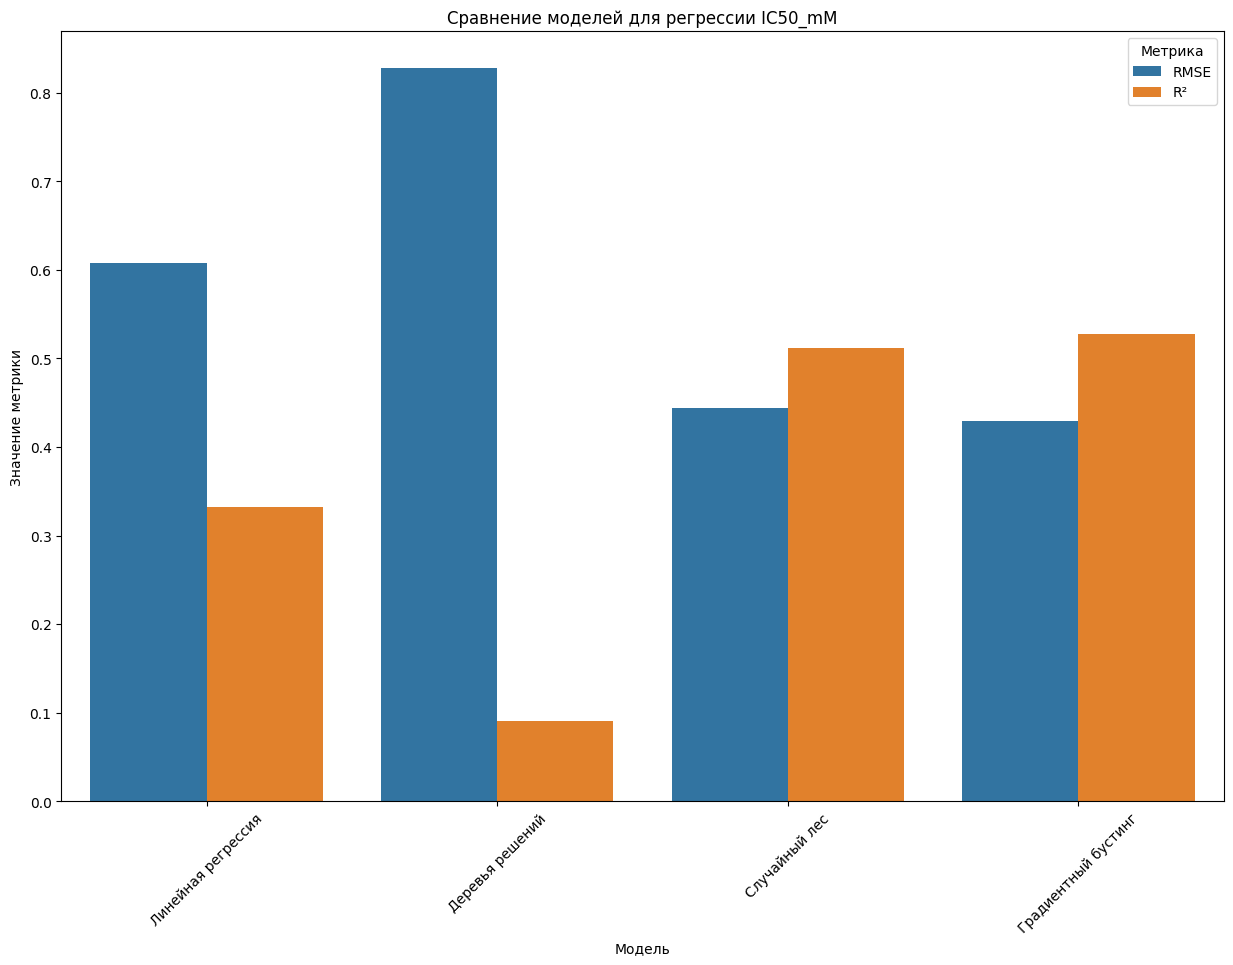

In [9]:
# Визуализация результатов
models = ['Линейная регрессия', 'Деревья решений', 'Случайный лес', 'Градиентный бустинг']
metrics = ['RMSE', 'R²']
results = {
    'Модель': [],
    'Метрика': [],
    'Значение': []
}

# Добавление результатов для IC50_mM
for model_name, rmse, r2 in zip(models, [rmse_lr, rmse_dt, rmse_rf, rmse_gb], [r2_lr, r2_dt, r2_rf, r2_gb]):
    results['Модель'].extend([model_name] * len(metrics))
    results['Метрика'].extend(metrics)
    results['Значение'].extend([rmse, r2])

# Преобразование в DataFrame
df_results = pd.DataFrame(results)

# Визуализация результатов
plt.figure(figsize=(15, 10))
sns.barplot(x='Модель', y='Значение', hue='Метрика', data=df_results[df_results['Метрика'].isin(['RMSE', 'R²'])])
plt.title('Сравнение моделей для регрессии IC50_mM')
plt.ylabel('Значение метрики')
plt.xticks(rotation=45)
plt.show()


##### **3.2 Сравнение моделей**

В данном разделе мы сравним метрики качества четырех моделей регрессии: линейной регрессии, деревьев решений, случайного леса и градиентного бустинга. Результаты оценены по двум основным метрикам:

1. **RMSE (Root Mean Squared Error)**: Измеряет среднюю ошибку предсказания в абсолютных единицах. Чем меньше RMSE, тем лучше модель.
2. **R² (Коэффициент детерминации)**: Определяет долю изменчивости целевой переменной, объясняемую моделью. Значения R² ближе к 1 указывают на более высокое качество модели.

---

#### **Результаты моделей**

1. **Линейная регрессия**
    RMSE=0.6080534145838916, R²=0.3321787426737063

2. **Деревья решений**
    RMSE=0.828100171648452, R²=0.09050249777496133
   
3. **Случайный лес**
    RMSE=0.4441471963088565, R²=0.5121959157498909

4. **Градиентный бустинг**
    RMSE=0.42966246917644224, R²=0.5281044008482523
   
---

### **Анализ результатов**

#### **1. RMSE**
- **Лучшая модель**: Градиентный бустинг (`GradientBoostingRegressor`) показал наименьшее значение RMSE (0.42966), что указывает на его лучшую способность точно предсказывать значения `log_IC50_mM`.
- **Худшая модель**: Деревья решений (`DecisionTreeRegressor`) имеют наибольшее значение RMSE (0.82810), что говорит о том, что эта модель менее точна в сравнении с другими.

#### **2. R²**
- **Лучшая модель**: Градиентный бустинг также демонстрирует наивысший коэффициент детерминации (R² = 0.52810), что указывает на то, что он объясняет большую часть изменчивости целевой переменной.
- **Худшая модель**: Деревья решений имеют самый низкий R² (0.09050), что свидетельствует о слабой способности модели объяснить изменчивость данных.

---

### **Выводы**
1. **Лучшая модель**: На основе обоих метрик (RMSE и R²) **градиентный бустинг** является наиболее эффективной моделью для прогнозирования `log_IC50_mM`. Он показывает как наименьшее значение RMSE, так и наибольшее значение R² среди всех рассмотренных моделей.
2. **Случайный лес**: Модель случайного леса (`RandomForestRegressor`) также демонстрирует хорошие результаты, но немного уступает градиентному бустингу.
3. **Линейная регрессия**: Хотя линейная регрессия (`LinearRegression`) имеет приемлемые результаты, она значительно уступает ансамблевым моделям (случайному лесу и градиентному бустингу).
4. **Деревья решений**: Деревья решений (`DecisionTreeRegressor`) показали худшие результаты среди всех моделей. Это может быть связано с их склонностью к переобучению или недостаточной способностью улавливать сложные взаимосвязи между признаками и целевой переменной.

---

##### **3.3 Лучшие параметры для градиентного бустинга и важность признаков**

- **Подбор лучших параметров**: После выполнения `GridSearchCV` для градиентного бустинга выводятся лучшие значения гиперпараметров, найденные во время кросс-валидации.
- **Извлечение важности признаков**: Для лучшей модели градиентного бустинга вычисляется важность каждого признака (`feature_importances_`).
- **Сортировка и визуализация**: Признаки сортируются по убыванию важности, и первые 20 отображаются на столбчатой диаграмме. Это помогает понять, какие признаки наиболее информативны для прогнозирования `IC50_mM`.


Лучшие параметры градиентного бустинга: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


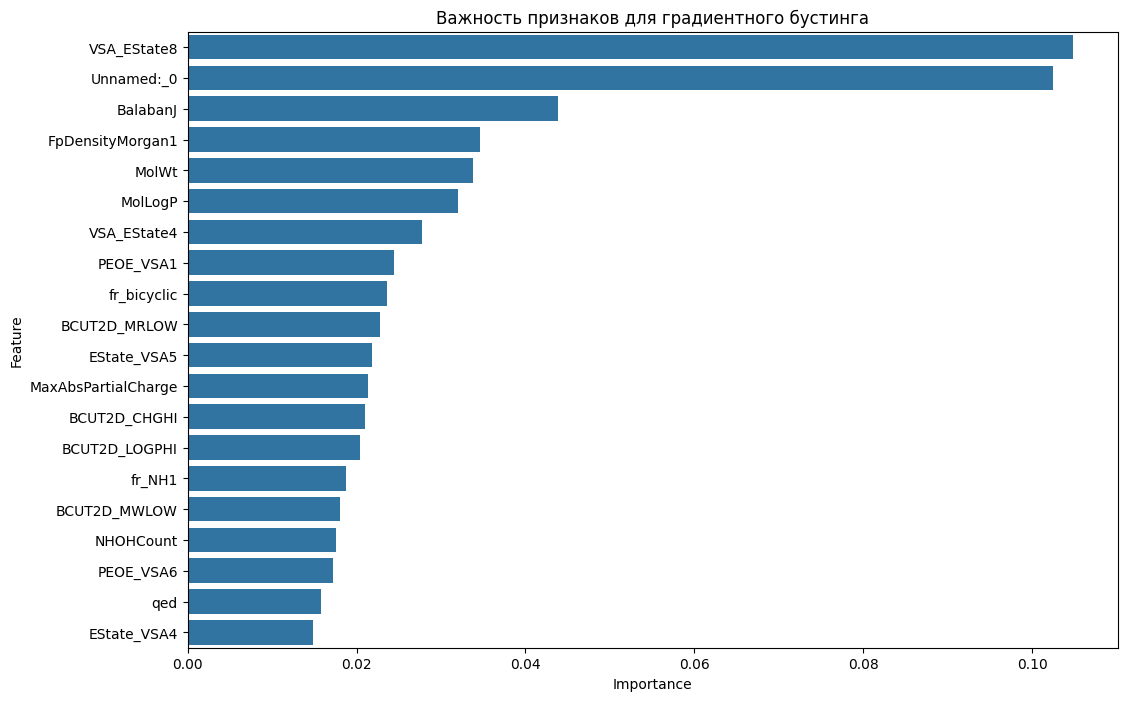

In [10]:

# Лучшие параметры для градиентного бустинга
best_gb = grid_gb.best_estimator_
print(f'Лучшие параметры градиентного бустинга: {grid_gb.best_params_}')

# Важность признаков
feature_importances = best_gb.feature_importances_
features = X.columns

# Создание DataFrame для важности признаков
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Важность признаков для градиентного бустинга')
plt.show()

# Сохранение результатов в Excel
df_results.to_excel('reports/regression_ic50_metrics.xlsx', index=False)
importance_df.to_excel('reports/regression_ic50_feature_importance.xlsx', index=False)